# Introduction 

In this project, we are going to analyze customer value using LRFMC model from avation dataset; Airline Customer Segmentation data. We are going to segmented the customer from low customer value to high customer value using `KMeans` model.

The data contains several information as follows:

<center>
    
| Columns  | Description | 
|----------|-------------|
| `MEMBER_NO` | Membership card number (ID) |
| `FFP_DATE` | Membership join date |
| `FIRST_FLIGHT_DATE` | First flight date |
| `GENDER` | Gender |
| `FFP_TIER` | Membership card level|
| `WORK_CITY` | The city where the customer works |
| `WORK_PROVINCE` | The province where the customer works |
| `WORK_COUNTRY` | The country where the customer works |
| `AGE` | Age |
| `LOAD_TIME` | The end time of the observation window |
| `FLIGHT_COUNT` | Number of flights in the observation window |
| `SUM_YR_1` | Fare revenue |
| `SUM_YR_2` | Votes prices |
| `SEG_KM_SUM` | Total flight kilometers in the observation window |
| `LAST_FLIGHT_DATE` | Last flight date |
| `LAST_TO_END` | The time from the last flight to the end of the observation window | 
| `AVG_INTERVAL` | Average flight time interval | 
| `MAX_INTERVAL` | Maximum flight interval | 
| `avg_discount` | Average discount rate | 
| `BP_SUM` | Total basic integral | 
| `EXCHANGE_COUNT` | Number of points exchanged | 
| `Points_Sum` | Total cumulative points | 
| `Point_NotFlight` | Points not used by the customer | 
    
</center>

### Notes:
- Observation window: time period of observation

## 1. Data Exploration

In this section, we are going to understand the general info and properties of the dataset. Furthermore, we do univariate analysis for advanced analysis

**Outlines:**
1. Explore general properties of the dataset
2. Categorical and numerical description calculation
3. Univariate analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

from tqdm import tqdm
import time

pd.set_option('display.max_columns', 200)

plt.style.use('bmh')

%matplotlib inline

In [2]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Observation

- There are 23 attributes about the dataset, they contain basic customer information, flight information, and integration information.
- Total data are 62988 entries. However, we found there are some attributes which have missing values, such as WORK_PROVINCE that shows 59740 entries.
- There are two type of data here: numeric showed by `int64` and `float64` types, and category showed by `object` type.

In [4]:
# get the columns of numeric and category
numeric_cols = df.select_dtypes(['float64', 'int64']).columns.tolist()
category_cols = df.select_dtypes('object').columns.tolist()

In [5]:
# category properties
df[category_cols].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


In [6]:
# numeric properties
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


### Univariate Analysis

Explores some variables in a dataset separately. 
- For categorical variables, the analysis uses `countplot`. The variables under interest are `GENDER`, `FIRST_FLIGHT_DATE` in a year, and `LAST_FLIGHT_DATE`
- For numerical variables, the analysis uses `histplot` and `boxplot`. We are interested in understanding the normallity properties of the dataset using `histplot` and check how spreading the outlier in a dataset using `boxplot`

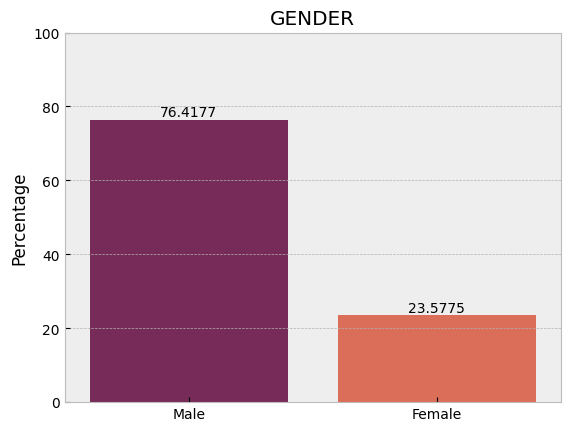

In [7]:
# gender plot
ax = sns.countplot(df, x='GENDER', stat='percent', palette='rocket')

for label in ax.containers:
    ax.bar_label(label)
    
ax.set(xlabel='', ylabel='Percentage', title='GENDER')
plt.ylim(0,100)
plt.show()

In [8]:
df['GENDER'].value_counts()

GENDER
Male      48134
Female    14851
Name: count, dtype: int64

### Observation

- Most of the customer of the airline is a male with 76.4% of total customer. Using `value_count()`, there are 48134 male as a airline customer.
- Whereas, female customer only 23.6% of total customer or in total 14851 female

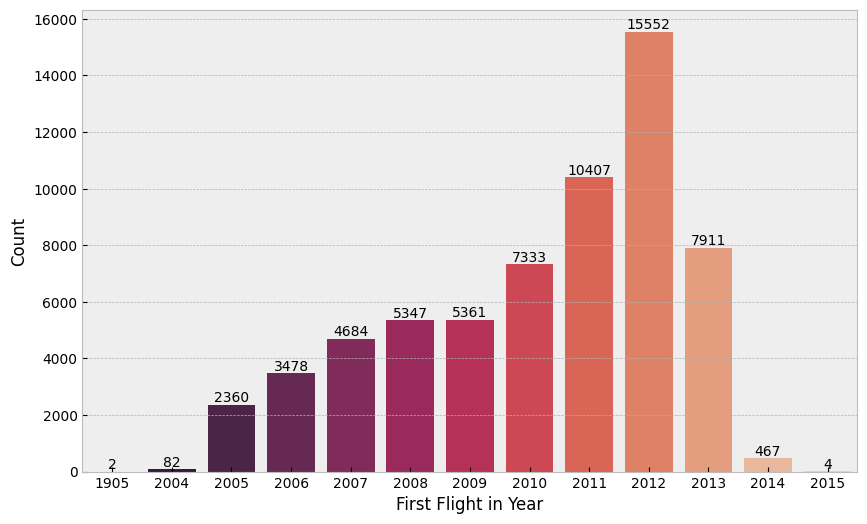

In [9]:
# first flight in year 
first_flight = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year

plt.figure(figsize=(10,6))
ax = sns.countplot(x=first_flight, palette='rocket')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='First Flight in Year', ylabel='Count')
plt.show()

### Observation

- The data shows `FIRST_FLIGHT` from 1905 to 2015. It seems, as time goes on, the number of passenger using airline increase gradually to 2012. However, after 2012 it seems decreasing. 
- Most customer flight for their first time in 2012, with total 15552. And lowest number of customer firstly flight in 1905 and 2015 which are only 2 and 4 passenger respectively.
- Data observation for 1905 and 2015 seems an outlier, the observation before 2004 is too far, and potentially provide unrelevant observation in the cluster model. Also, observation for 2015 might be because of human error since the end observation windows (LOAD_TIME) is 2014

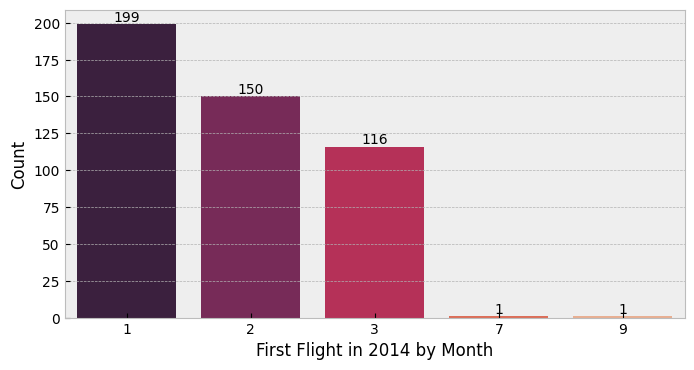

In [10]:
# first flight in month in 2014

df_month_flight = df[df['FIRST_FLIGHT_DATE'].str.contains('2014')]
month_flight = pd.to_datetime(df_month_flight['FIRST_FLIGHT_DATE']).dt.month

plt.figure(figsize=(8,4))
ax = sns.countplot(x=month_flight, palette='rocket')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='First Flight in 2014 by Month', ylabel='Count')
plt.show()

### Observation

- From the dataset we have the load time is 2014-03-31, so the end of observation time is on March. However, if we check First Flight in 2014 by month, we obtain there 1 flight schedule on July and Sept, which potentially an outliers. Therefore, we will handle those in Data Cleaning section

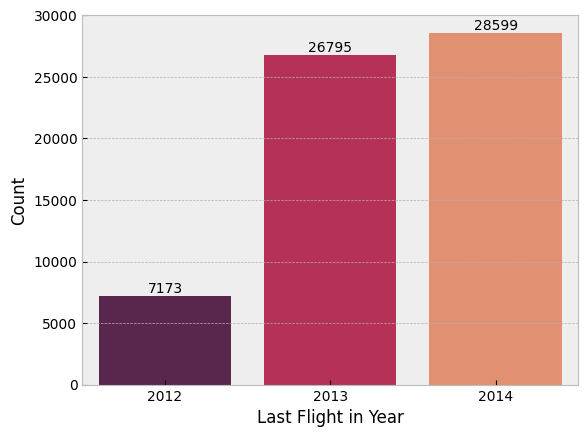

In [11]:
#last flight in year

#drop for last flight 2014-2-29 since in that year, february is until 28
df_last = df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index)

last_flight = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
ax = sns.countplot(x=last_flight, palette='rocket')

for label in ax.containers:
    ax.bar_label(label)
    
ax.set(xlabel='Last Flight in Year', ylabel='Count')
plt.show()

### Observation

- Most customer's last flight are in 2014 with total 28599 customers.

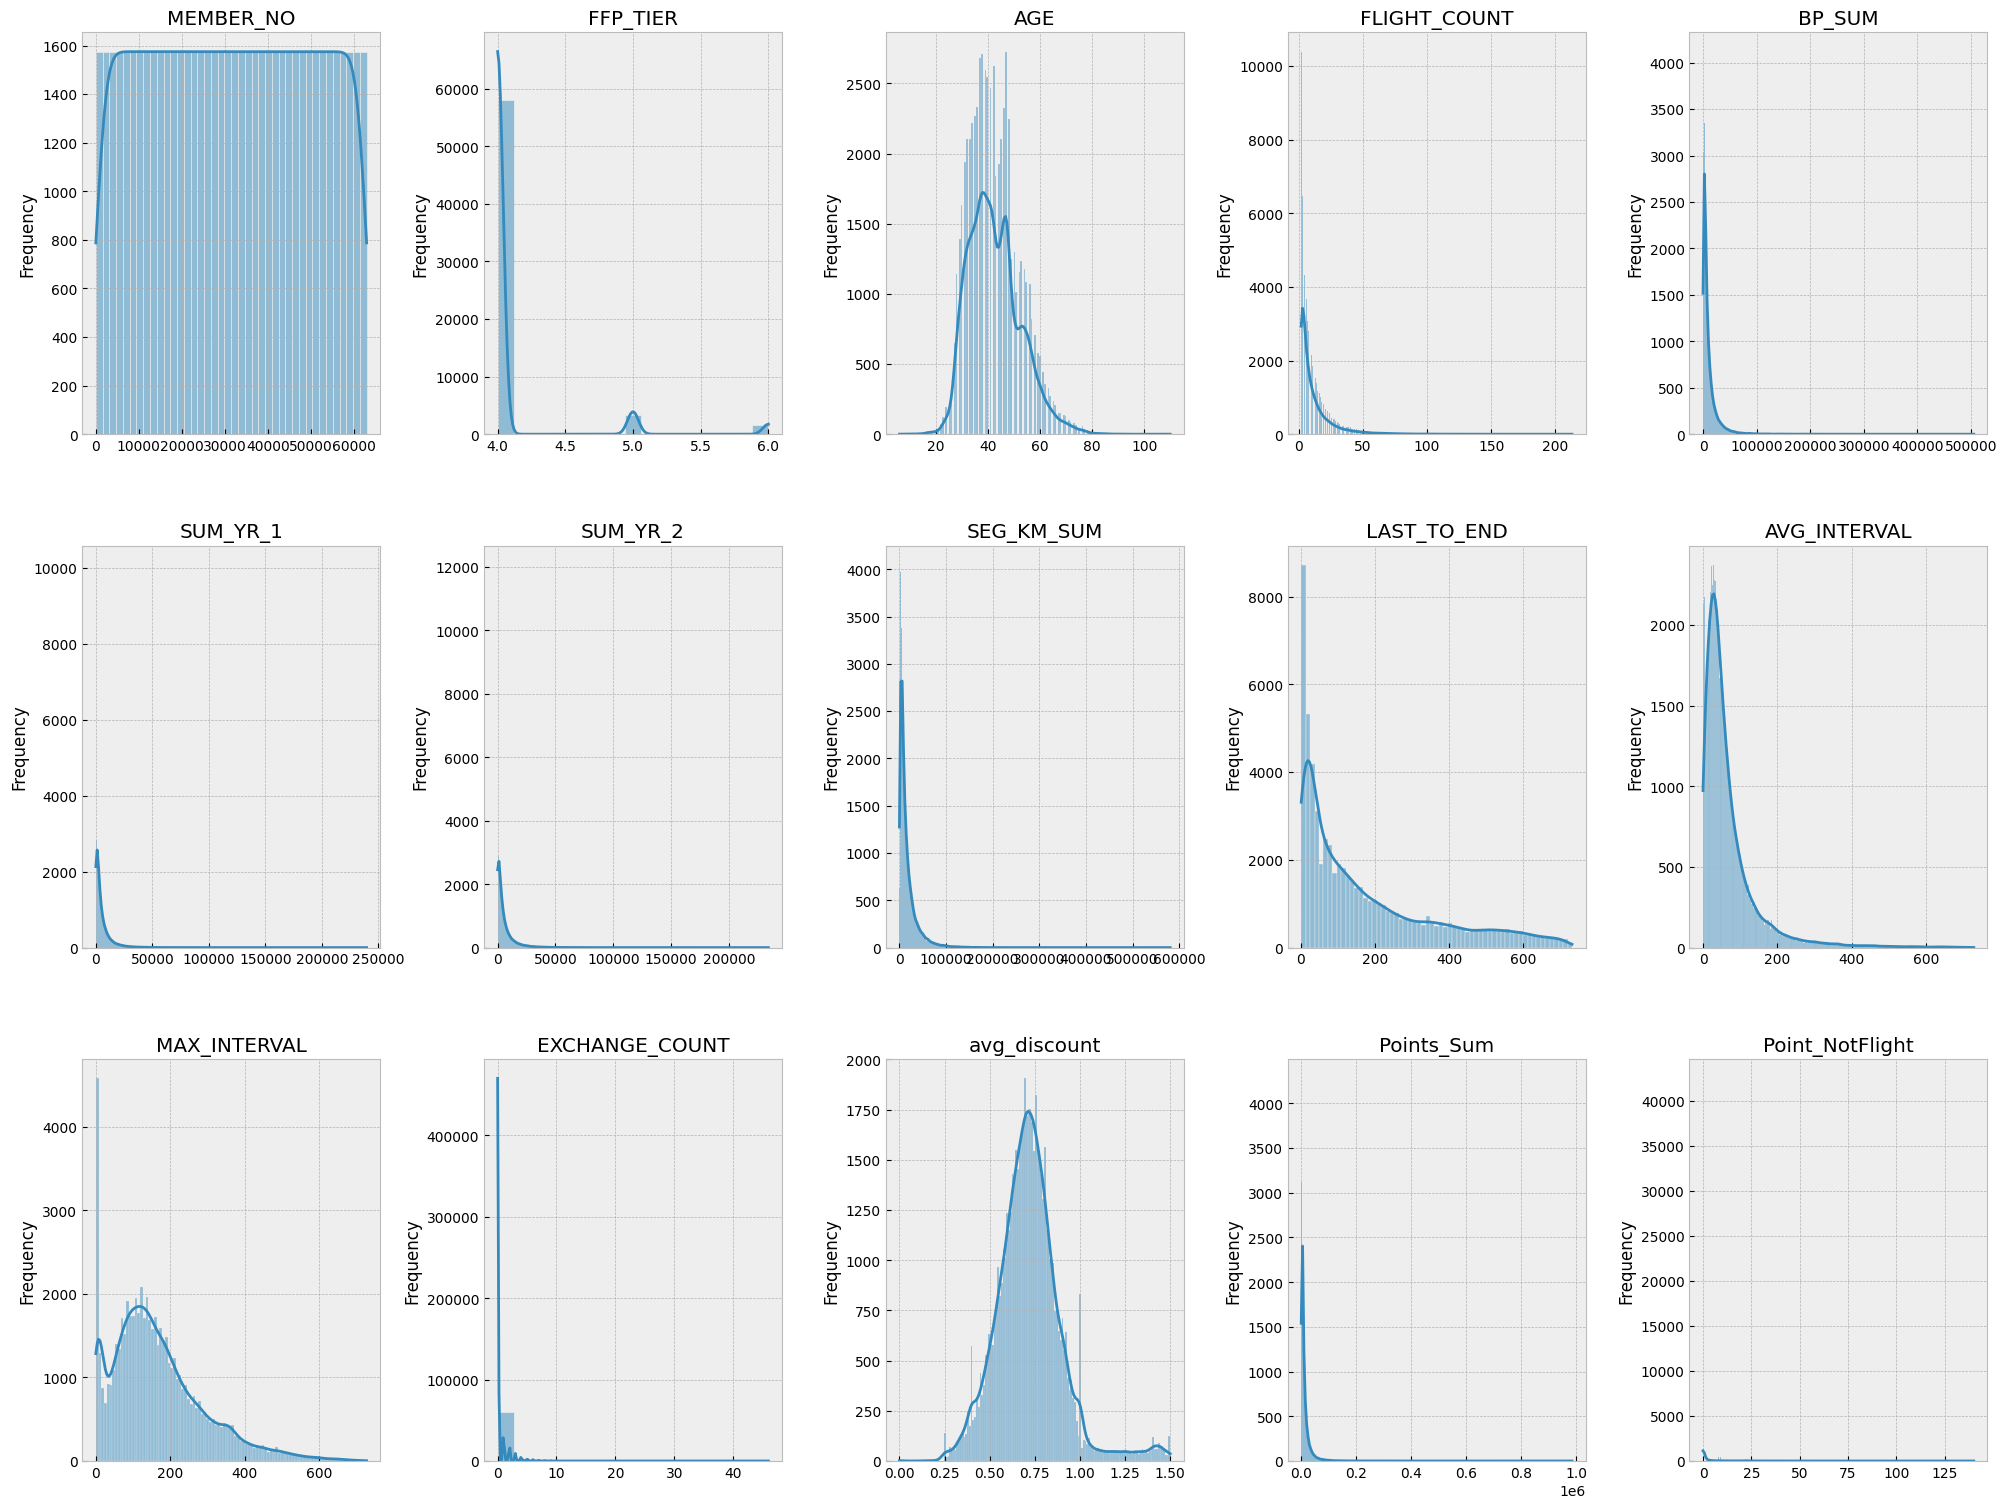

In [12]:
# numerical plot using histtogram with kde true
df_numeric = df[numeric_cols]

fig, axes = plt.subplots(3,5, figsize=(20,15))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df_numeric, x=df_numeric.columns[index], kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df_numeric.columns[index])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

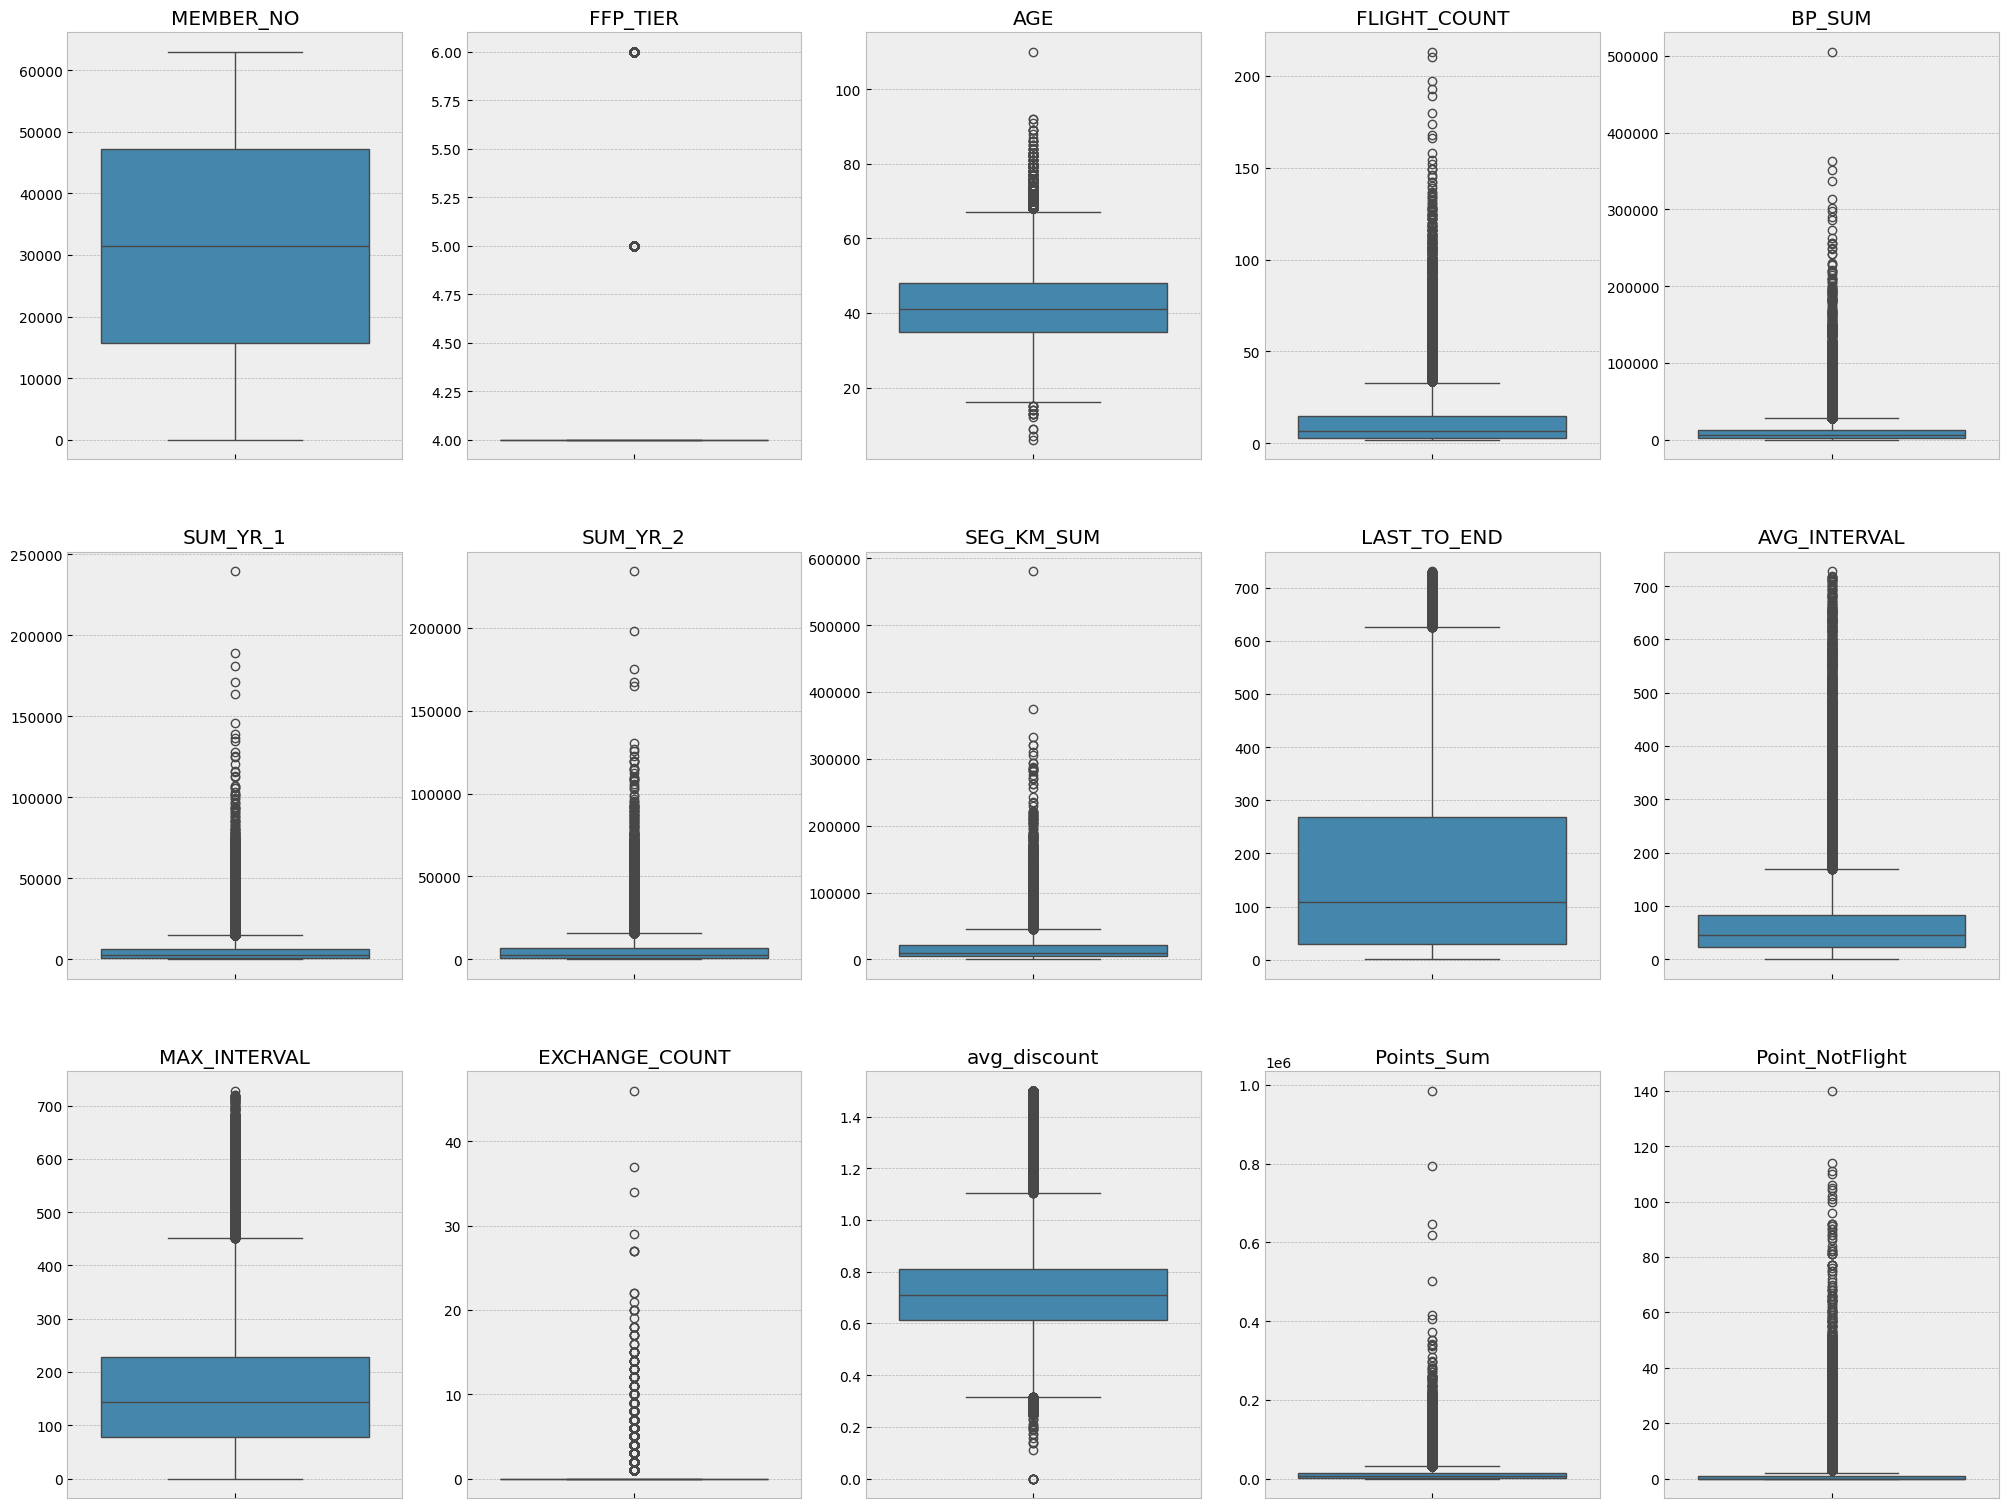

In [13]:
# displaying an outliers using boxplot
fig, axes = plt.subplots(3,5, figsize=(20,15))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df_numeric, y=df_numeric.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df_numeric.columns[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

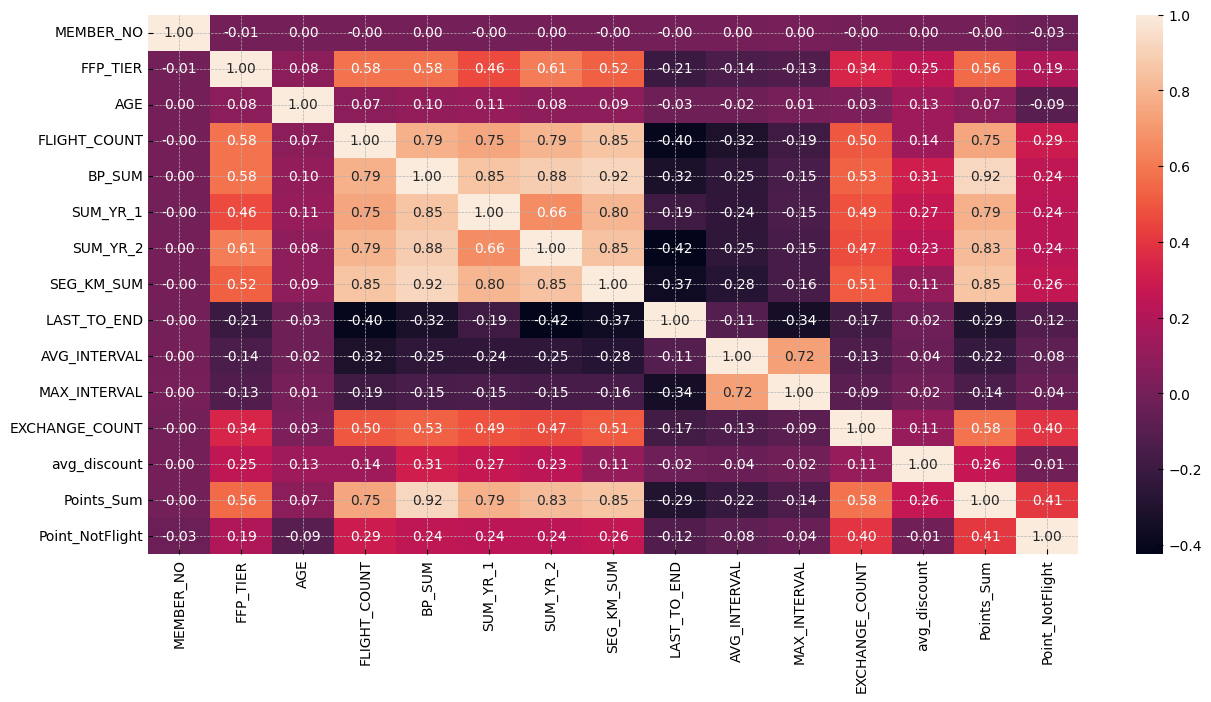

In [14]:
# corelation between attributes using heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

## Data Cleaning

Cleaning the data is the most important step that we cannot avoid. To clean this dataset, we will use several self-assumption and referencing Yang Tao in his paper.

**Contents:**

1. Missing value handling
2. Self-assumption cleaning
3. Outliers handling
4. Aviation dataset cleaning referencing Yang Tao

In [15]:
def missing_value(df):
    
    missing = []
    for columns in df.columns:
        missing_shape = df[df[columns].isna()].shape
        percentage = round(missing_shape[0]/df.shape[0] * 100, 3)

        if df[columns].dtypes != 'object':
            max, min = df[columns].max(), df[columns].min()
        else:
            max, min = '-', '-'
            
        missing.append({'Columns' : columns.upper(),
                        'N/A count' : missing_shape[0],
                        'Percentage' : str(percentage) + '%',
                        'Max' : max,
                        'Min' : min}
                        )
    return pd.DataFrame(missing)

missing_value(df).sort_values(by='Percentage', ascending=False)

,Columns,N/A count,Percentage,Max,Min
6,WORK_PROVINCE,3248,5.157%,-,-
5,WORK_CITY,2269,3.602%,-,-
12,SUM_YR_1,551,0.875%,239560.0,0.0
8,AGE,420,0.667%,110.0,6.0
13,SUM_YR_2,138,0.219%,234188.0,0.0
7,WORK_COUNTRY,26,0.041%,-,-
3,GENDER,3,0.005%,-,-
0,MEMBER_NO,0,0.0%,62988,1
15,LAST_FLIGHT_DATE,0,0.0%,-,-
21,POINTS_SUM,0,0.0%,985572,0


In [16]:
total_missing = df[df.isna().any(axis=1)].shape[0]
total_missing_percentage = round(total_missing / df.shape[0] * 100,3)

print('Total missing value : {}'.format(total_missing))
print('Total missing value percentage : {}'.format(str(total_missing_percentage) + '%'))

Total missing value : 4733
Total missing value percentage : 7.514%


### Observation

- The data have 7 columns with missing value; total missing is 4733 data with 7.514 % in percentage
- The most significant contribution to missing value data are from WORK_CITY and WORK_PROVINCE, those contributes to 5.157% and 3.602% respectively. It contains NaN value and other undescriptable label like (*., ?, etc.*).
- The minimum value of ticket price, fare revenue, and average discount is 0.

### Missing Value Handling

In [17]:
# drop WORK_CITY and WORK_PROVINCE first, since they're contribute hugely to missing value data
df = df.drop(['WORK_CITY', 'WORK_PROVINCE'], axis=1)

# drop all nan value
df.dropna(inplace=True)

# check missing value again
missing_value(df)

,Columns,N/A count,Percentage,Max,Min
0,MEMBER_NO,0,0.0%,62988,2
1,FFP_DATE,0,0.0%,-,-
2,FIRST_FLIGHT_DATE,0,0.0%,-,-
3,GENDER,0,0.0%,-,-
4,FFP_TIER,0,0.0%,6,4
5,WORK_COUNTRY,0,0.0%,-,-
6,AGE,0,0.0%,110.0,6.0
7,LOAD_TIME,0,0.0%,-,-
8,FLIGHT_COUNT,0,0.0%,213,2
9,BP_SUM,0,0.0%,505308,0


### Self-Assumption Cleaning

In [18]:
# remove first flight data for which flight on 1905 and 2015, those are assumed to be an outliers
year = ['1905', '2015']
for y in year:
    df.drop(df[df.FIRST_FLIGHT_DATE.str.contains(y)].index, inplace=True)

# remove first flight data for month July and Sept in 2014, this removal is based on the end of observation time being 2014-03-31
df.drop(df_month_flight[(month_flight == 7) | (month_flight == 9)].index, inplace=True)

# remove last flight on 2014-02-29, since in that year, february only until 28 date
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace=True)

### Outliers Calculation

In [19]:
def outliers_detection(df, cleaning=False):
    outliers_list = []
    
    for col in df.columns:
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        
        IQR  = percentile75 - percentile25
        
        upper_limit = percentile75 + 1.5*IQR
        lower_limit = percentile25 - 1.5*IQR
        
        outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
        percentage = round(outliers.shape[0] / df.shape[0] * 100,2)

        if cleaning == True:
            df.drop(outliers.index, inplace=True)
        
        outlier_dict = {'Feature' : col.upper(),
                        'Total Outliers' : outliers.shape[0],
                        'Outlier Percentage' : str(percentage) + '%'}
        
        outliers_list.append(outlier_dict)
    
    # display it using dataframe for better reading
    outlier_df = pd.DataFrame(outliers_list)
    
    return outlier_df, df

numeric_cols = df.select_dtypes(['float64', 'int64']).columns.tolist()
outliers, _ = outliers_detection(df[numeric_cols])
outliers

,Feature,Total Outliers,Outlier Percentage
0,MEMBER_NO,0,0.0%
1,FFP_TIER,4848,7.89%
2,AGE,984,1.6%
3,FLIGHT_COUNT,4250,6.92%
4,BP_SUM,5196,8.46%
5,SUM_YR_1,4867,7.92%
6,SUM_YR_2,5053,8.23%
7,SEG_KM_SUM,4680,7.62%
8,LAST_TO_END,1991,3.24%
9,AVG_INTERVAL,4712,7.67%


### Observation

- Almost all the features have an outliers greater than 5%. Only `Age`, `LAST_TO_END`, `MAX_INTERVAL`, and `AVG_DISCOUNT` that have an outliers below 5%.
- Several features that have an outliers above 10 % are `EXCHANGE_COUNT` and `POINT_NOTFLIGHT`
- The outliers are too much, removing all the outliers are not a good move. Let's no intefere the outliers at the moment.
- The outliers will be handled according to which features we want to keep for further processing.

### Cleaning the data by referencing Y. Tao 

- Discard the record with empty ticket price
- Discard the record with the fare is zero
- Discard the average discount is zero and total flying kilometers are greater than zero

In [20]:
# discard the record with empty ticket and fare revenue zero
df = df[~((df['SUM_YR_1'] == 0) & (df['SUM_YR_2'] == 0))]

# discard average discount zero and total flying km greater than zero
df = df[~((df['avg_discount'] == 0) & (df['SEG_KM_SUM'] > 0))]

## Data Transformation

Using LRFMC methods

1. Length : length of days of customer register to observation time
2. Recency : last time the customer use the airline
3. Frequency : how frequent customer use airline
4. Monetary : how much customer spent in airline
5. Customer Cost : average space discount the customer used


- Length : LOAD_TIME - FFP_DATE
- Recency : LAST_TO_END
- Frequency : FLIGHT_COUNT
- Monetary : SEG_KM_SUM
- Customer Cost : avg_discount

In [21]:
def RFM_Plots(df, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (.2, 1)})
    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(df[column], kde=True, ax=ax_hist)
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [22]:
load_time = pd.to_datetime(df['LOAD_TIME'])
ffp_date = pd.to_datetime(df['FFP_DATE'])

df['LENGTH'] = ((load_time - ffp_date).dt.days)

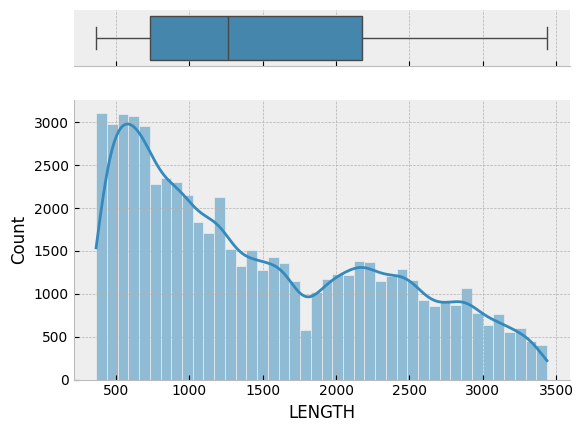

In [23]:
RFM_Plots(df, 'LENGTH')

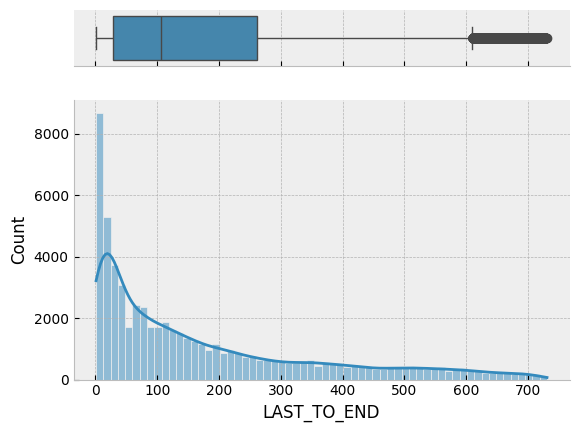

In [24]:
RFM_Plots(df, 'LAST_TO_END')

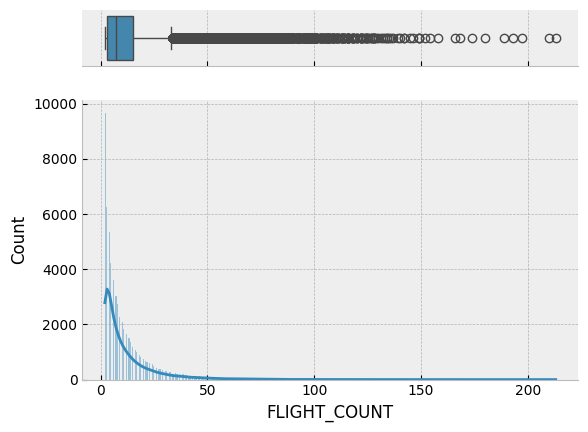

In [25]:
RFM_Plots(df, 'FLIGHT_COUNT')

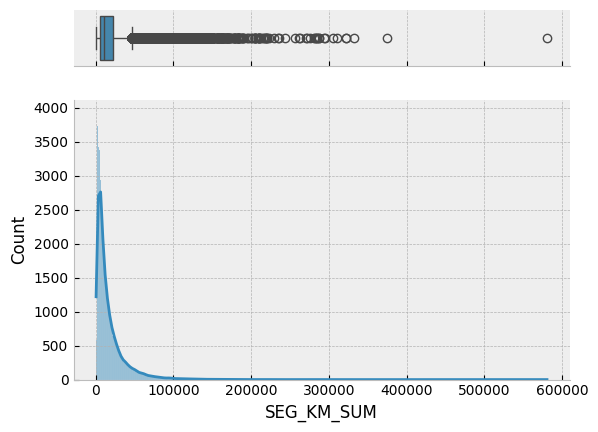

In [26]:
RFM_Plots(df, 'SEG_KM_SUM')

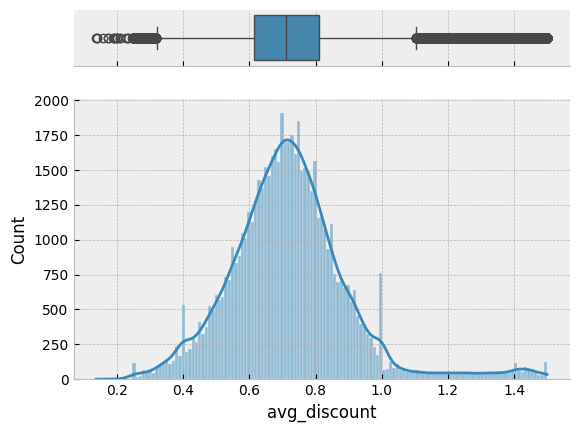

In [27]:
RFM_Plots(df, 'avg_discount')

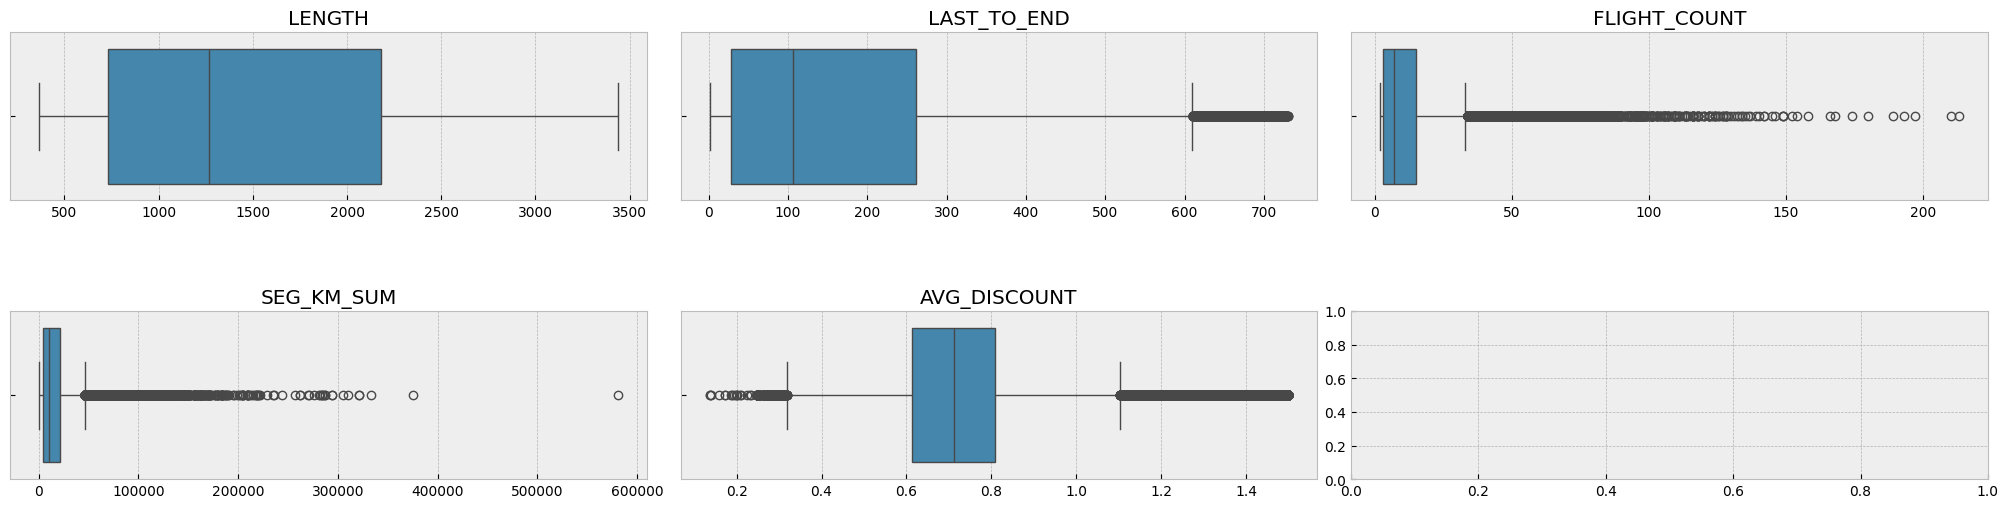

In [28]:
rfm_columns = ['LENGTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']

df_rfm = df[rfm_columns]

def boxplot(df, columns):
    
    # displaying an outliers using boxplot
    fig, axes = plt.subplots(2,3, figsize=(20,5))
    
    for index, axs in enumerate(axes.flatten()[:len(columns)]):
        plot = sns.boxplot(data=df, x=df.columns[index], ax=axs)
        plot.set(xlabel='', ylabel='', title=df.columns[index].upper())
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

boxplot(df_rfm, rfm_columns)

In [29]:
rfm_outliers, df_rfm_clean = outliers_detection(df[rfm_columns], cleaning=True)
rfm_outliers

,Feature,Total Outliers,Outlier Percentage
0,LENGTH,0,0.0%
1,LAST_TO_END,2091,3.42%
2,FLIGHT_COUNT,4782,8.09%
3,SEG_KM_SUM,2510,4.62%
4,AVG_DISCOUNT,1842,3.56%


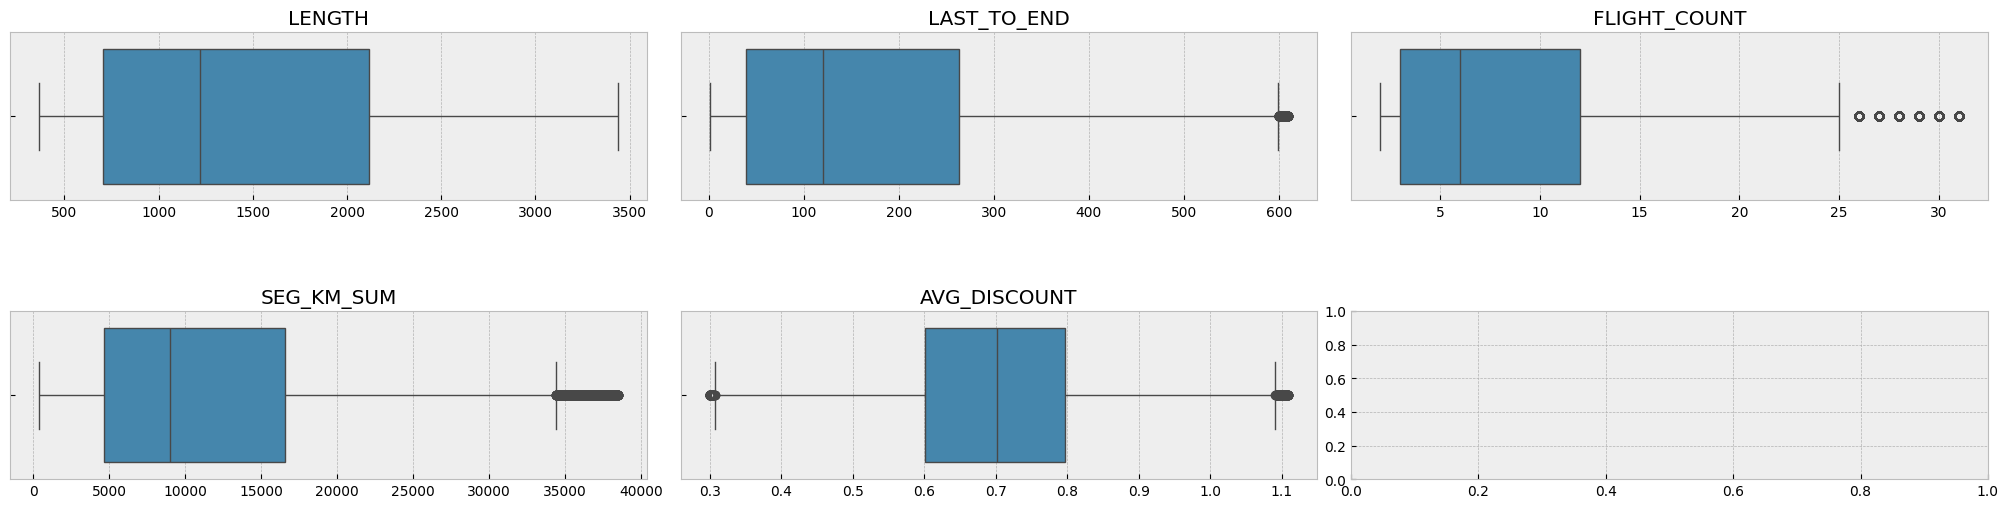

In [30]:
boxplot(df_rfm_clean, rfm_columns)

In [31]:
rfm_outliers, _ = outliers_detection(df_rfm_clean[rfm_columns])
rfm_outliers

,Feature,Total Outliers,Outlier Percentage
0,LENGTH,0,0.0%
1,LAST_TO_END,229,0.46%
2,FLIGHT_COUNT,1189,2.38%
3,SEG_KM_SUM,1025,2.05%
4,AVG_DISCOUNT,140,0.28%


In [32]:
new_columns = {'LENGTH' : 'length', 
               'LAST_TO_END' : 'recency',
               'FLIGHT_COUNT' : 'frequency',
               'SEG_KM_SUM' : 'monetary',
               'avg_discount' : 'customer_cost'}

df_rfm_clean = df_rfm_clean.rename(columns=new_columns)

In [33]:
df_rfm_clean.head()

,length,recency,frequency,monetary,customer_cost
3564,2895,3,25,37879,1.070041
3774,600,8,22,36613,1.078831
3813,2716,49,13,36655,1.072307
3833,3267,16,25,37274,1.052450
3919,2240,6,26,36255,1.069318


In [34]:
df_rfm_clean.describe()

,length,recency,frequency,monetary,customer_cost
count,49952.000000,49952.000000,49952.000000,49952.000000,49952.000000
mean,1436.463425,172.402326,8.351517,11664.072590,0.698034
std,832.881954,161.723406,6.454763,8792.371821,0.146780
min,365.000000,1.000000,2.000000,368.000000,0.299421
25%,705.000000,39.000000,3.000000,4666.750000,0.601138
50%,1218.000000,120.000000,6.000000,8980.000000,0.701450
75%,2114.000000,263.000000,12.000000,16567.500000,0.797118
max,3437.000000,610.000000,31.000000,38492.000000,1.109559


<Axes: >

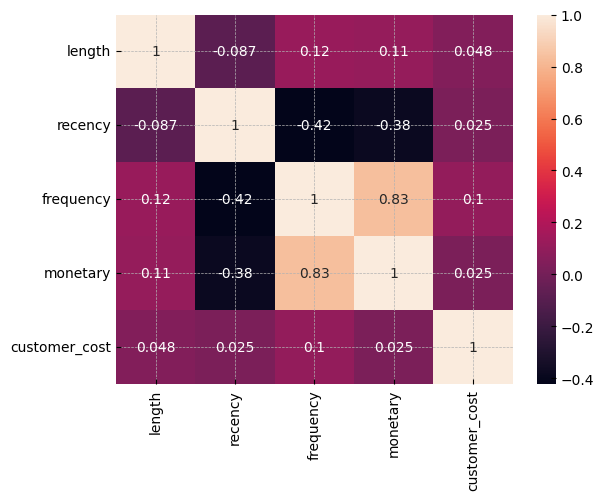

In [35]:
# check the correlation between each feature
sns.heatmap(df_rfm_clean.corr(),cbar=True,annot=True)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_rfm_clean.astype(float))

df_scaled = pd.DataFrame(data=scaled_features, columns = df_rfm_clean.columns)

In [38]:
df_scaled

,length,recency,frequency,monetary,customer_cost
0,1.751210,-1.047492,2.579281,2.981583,2.534471
1,-1.004310,-1.016575,2.114504,2.837594,2.594357
2,1.536291,-0.763053,0.720170,2.842370,2.549911
3,2.197856,-0.967107,2.579281,2.912773,2.414626
4,0.964776,-1.028942,2.734207,2.796876,2.529548
...,...,...,...,...,...
49947,0.606979,1.518643,-0.984015,-1.284771,0.354042
49948,-0.971892,1.481542,-0.984015,-1.284771,0.354042
49949,-1.284064,1.141452,-0.984015,-1.240187,-2.371145
49950,2.176244,-0.515715,-0.984015,-1.284771,0.081523


<Axes: >

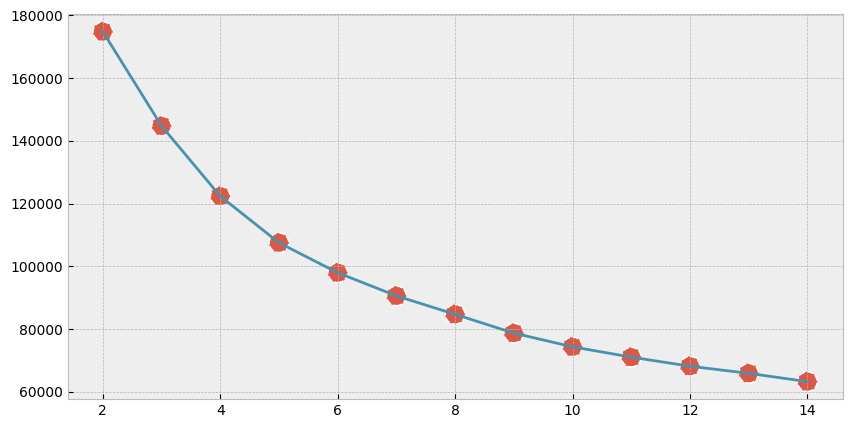

In [39]:
from sklearn.cluster import KMeans

inertia = []
kvalues = range(2,15)

for i in kvalues:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(2, 15), y=inertia, color='#4793AF', linewidth = 2)
sns.scatterplot(x=range(2, 15), y=inertia, s=200, color='#DD5746',  linestyle='--')

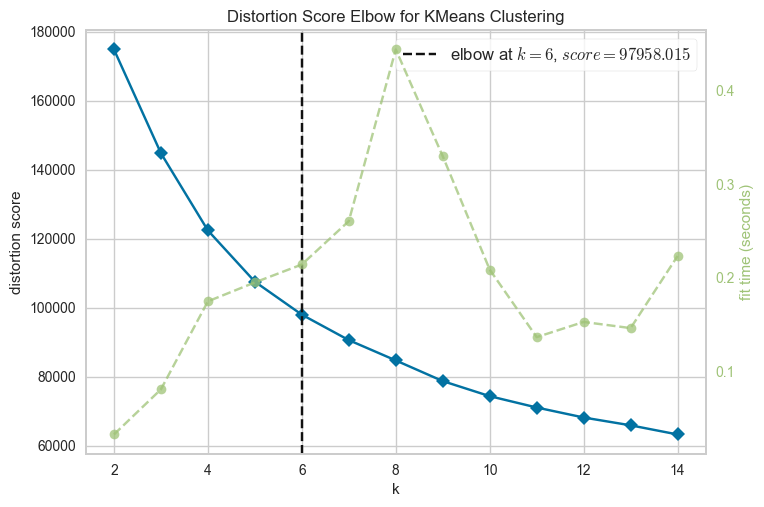

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_scaled)       
visualizer.show() 

In [49]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coefficients = []

for i in tqdm(kvalues, desc= 'silhouette progress bar'):
    print('Clusters : ', i)
    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(scaled_features)
    preds = kmeans.predict(scaled_features)
    
    score_euclidean = silhouette_score(scaled_features, preds, metric='euclidean')
    silhouette_coefficients.append(score_euclidean)
    time.sleep(0.5)

silhouette progress bar:   0%|                           | 0/13 [00:00<?, ?it/s]

Clusters :  2


silhouette progress bar:   8%|█▍                 | 1/13 [00:37<07:25, 37.12s/it]

Clusters :  3


silhouette progress bar:  15%|██▉                | 2/13 [01:15<06:54, 37.73s/it]

Clusters :  4


silhouette progress bar:  23%|████▍              | 3/13 [01:50<06:07, 36.71s/it]

Clusters :  5


silhouette progress bar:  31%|█████▊             | 4/13 [02:24<05:21, 35.71s/it]

Clusters :  6


silhouette progress bar:  38%|███████▎           | 5/13 [02:58<04:38, 34.78s/it]

Clusters :  7


silhouette progress bar:  46%|████████▊          | 6/13 [03:31<03:59, 34.23s/it]

Clusters :  8


silhouette progress bar:  54%|██████████▏        | 7/13 [04:09<03:33, 35.59s/it]

Clusters :  9


silhouette progress bar:  62%|███████████▋       | 8/13 [04:53<03:10, 38.15s/it]

Clusters :  10


silhouette progress bar:  69%|█████████████▏     | 9/13 [05:35<02:38, 39.56s/it]

Clusters :  11


silhouette progress bar:  77%|█████████████▊    | 10/13 [06:14<01:57, 39.31s/it]

Clusters :  12


silhouette progress bar:  85%|███████████████▏  | 11/13 [06:52<01:17, 38.92s/it]

Clusters :  13


silhouette progress bar:  92%|████████████████▌ | 12/13 [07:30<00:38, 38.52s/it]

Clusters :  14


silhouette progress bar: 100%|██████████████████| 13/13 [08:08<00:00, 37.61s/it]


<Axes: >

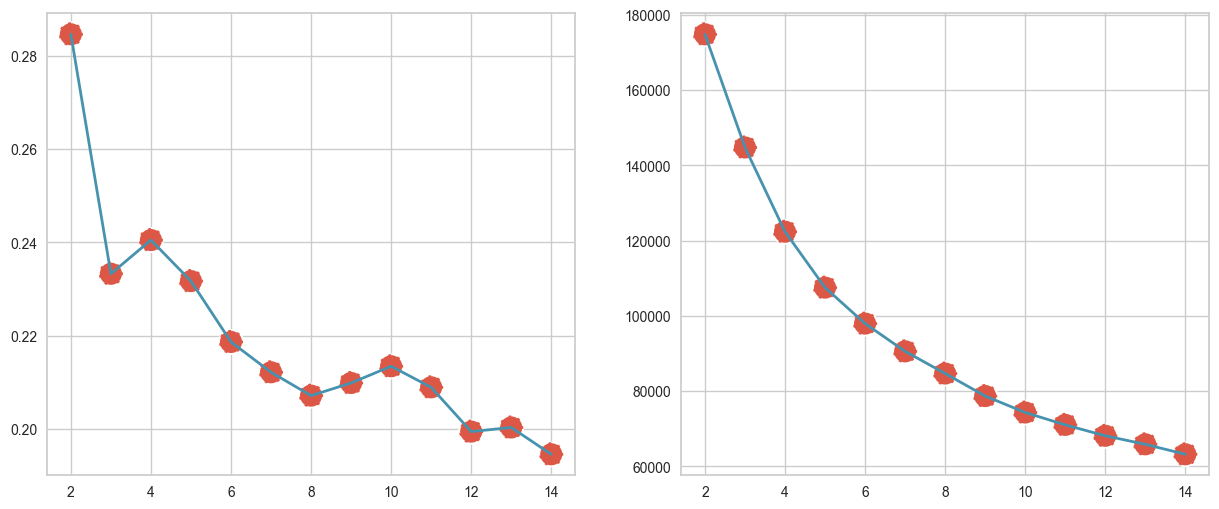

In [101]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(2,15), y=silhouette_coefficients, color='#4793AF', linewidth = 2, ax=ax[0])
sns.scatterplot(x=range(2,15), y=silhouette_coefficients, s=300, color='#DD5746',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(2, 15), y=inertia, color='#4793AF', linewidth = 2,ax=ax[1])
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#DD5746',  linestyle='--', ax=ax[1])

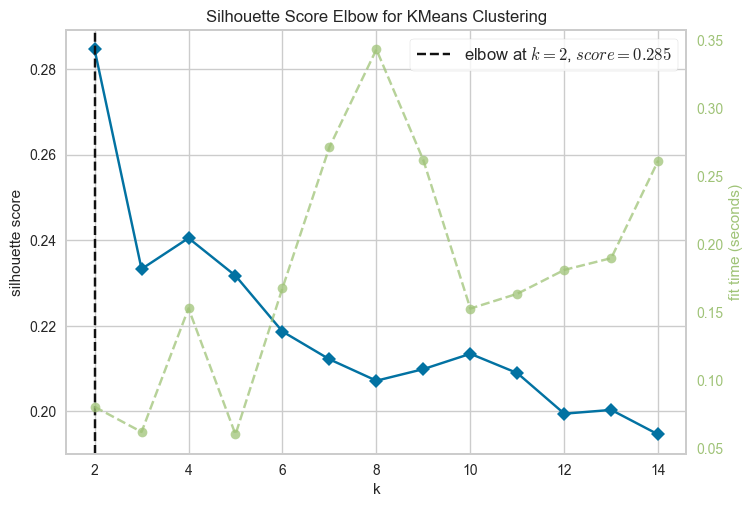

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [69]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_scaled)        
visualizer.show()    

sihouette visualization:   0%|                            | 0/5 [00:00<?, ?it/s]

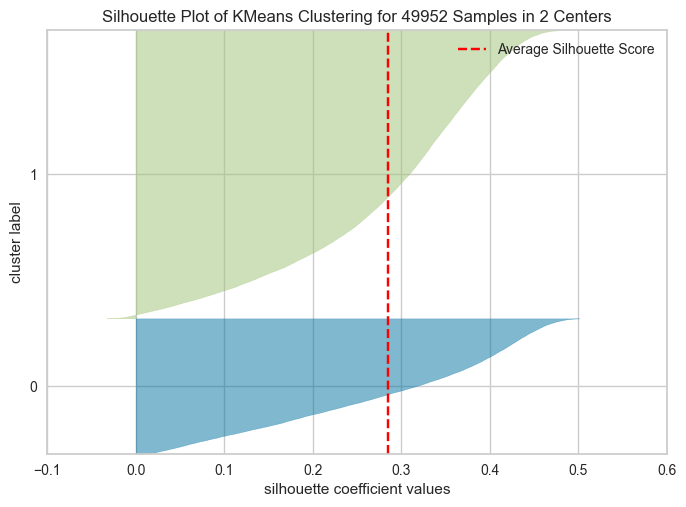

sihouette visualization:  20%|████                | 1/5 [01:23<05:32, 83.15s/it]

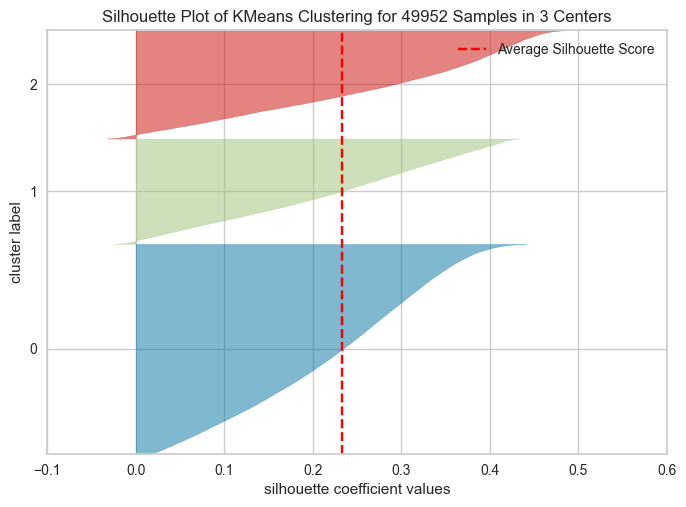

sihouette visualization:  40%|████████            | 2/5 [02:33<03:47, 75.84s/it]

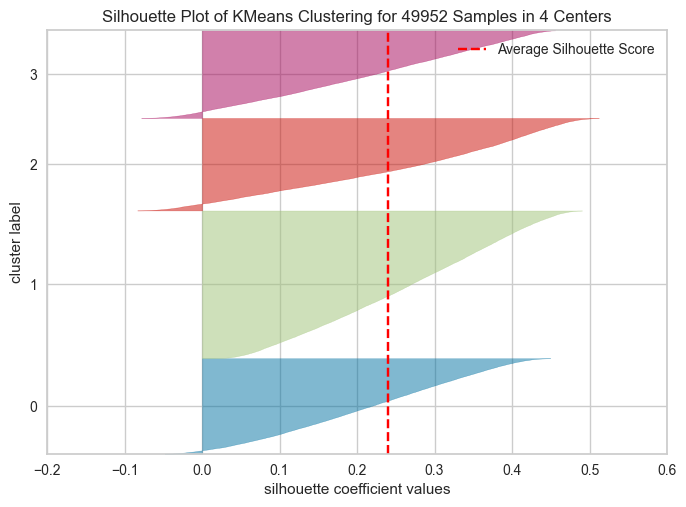

sihouette visualization:  60%|████████████        | 3/5 [03:41<02:24, 72.15s/it]

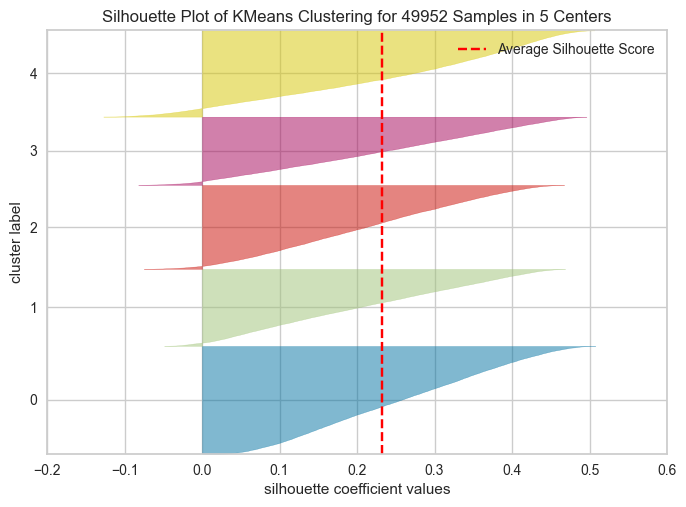

sihouette visualization:  80%|████████████████    | 4/5 [04:49<01:10, 70.35s/it]

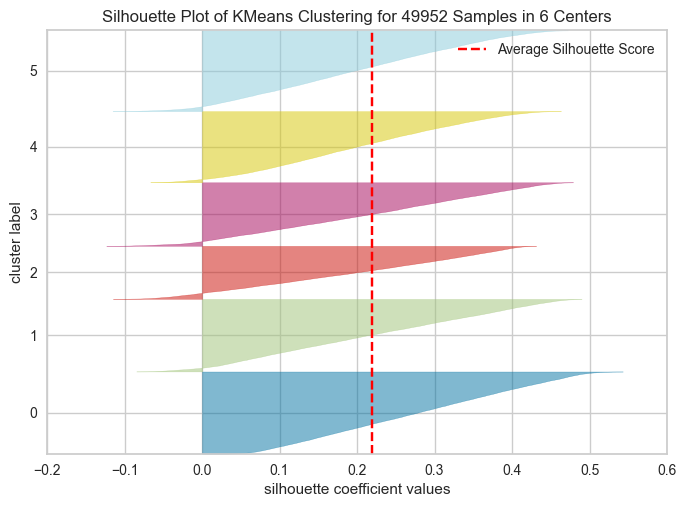

sihouette visualization: 100%|████████████████████| 5/5 [06:03<00:00, 72.65s/it]


In [74]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in tqdm([2,3,4,5,6], desc='sihouette visualization'):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_scaled)        
    visualizer.show()

In [102]:
# We use n_clusters = 6

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_scaled.values)
df_rfm_clean['clusters'] = kmeans.labels_
df_rfm_clean.head()

,length,recency,frequency,monetary,customer_cost,clusters
3564,2895,3,25,37879,1.070041,2
3774,600,8,22,36613,1.078831,2
3813,2716,49,13,36655,1.072307,2
3833,3267,16,25,37274,1.052450,2
3919,2240,6,26,36255,1.069318,2


In [103]:
df_rfm_clean.groupby('clusters').agg({'recency' : ['median'], 
                                      'frequency' : ['mean'],
                                      'monetary' : ['mean']
    
})

,recency,frequency,monetary
,median,mean,mean
clusters,,,
0,111.0,5.266722,6705.726270
1,176.0,4.208713,6368.456319
2,33.0,20.925831,27405.008792
3,464.0,3.962923,5910.731262
4,58.0,12.527990,18620.969747
5,105.0,6.734403,9536.050016


In [104]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_scaled)
pcs = pca.transform(df_scaled)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_
data_pca

,PC 1,PC 2,clusters
0,4.369732,2.570906,2
1,3.535365,1.312550,2
2,2.956841,2.546628,2
3,4.355800,2.705262,2
4,4.218029,2.205664,2
...,...,...,...
49947,-1.960318,0.993857,3
49948,-2.198351,0.226879,3
49949,-2.251334,-2.311227,1
49950,-0.824305,1.101583,5


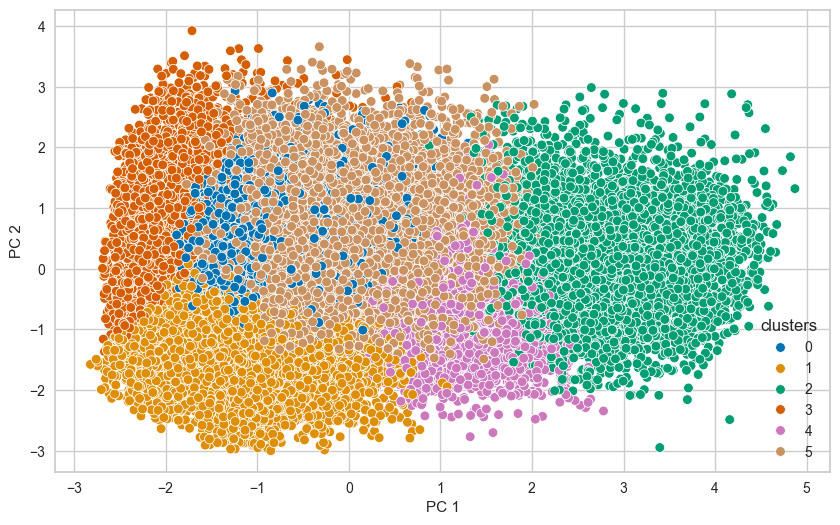

In [105]:
fig, ax = plt.subplots(figsize=(10,6))

plot = sns.scatterplot(x="PC 1", y="PC 2", hue="clusters", 
                       data=data_pca, palette = 'colorblind', legend='brief', ax=ax)

In [113]:
data_pca

,PC 1,PC 2,clusters
0,4.369732,2.570906,2
1,3.535365,1.312550,2
2,2.956841,2.546628,2
3,4.355800,2.705262,2
4,4.218029,2.205664,2
...,...,...,...
49947,-1.960318,0.993857,3
49948,-2.198351,0.226879,3
49949,-2.251334,-2.311227,1
49950,-0.824305,1.101583,5


In [111]:
display(df_rfm_clean.groupby('clusters').agg(['mean','median','min','max']))

length                         recency                   \
                 mean  median   min   max        mean median  min  max   
clusters                                                                 
0          935.598062   855.0   365  2406  121.429249  111.0    1  346   
1         1018.170638   882.0   365  3345  198.466363  176.0    1  605   
2         1910.967711  1981.5   365  3437   60.615729   33.0    1  514   
3         1273.871566  1072.0   365  3437  460.262470  464.0  255  610   
4          981.663530   898.0   365  2428   84.152573   58.0    1  539   
5         2538.532662  2502.0  1523  3437  125.567684  105.0    1  530   

          frequency                     monetary                        \
               mean median min max          mean   median   min    max   
clusters                                                                 
0          5.266722    5.0   2  18   6705.726270   6216.0   368  30408   
1          4.208713    4.0   2  16   6368.456319   5534.0   716  31231   
2         20.925831   21.0   3  31  27405.008792  27355.5  5152  38488   
3          3.962923    3.0   2  21   5910.731262   4632.0   368  33350   
4         12.527990   12.0   2  26  18620.969747  17822.5  4048  38492   
5          6.734403    6.0   2  19   9536.050016   8813.0   368  36696   

         customer_cost                                
                  mean    median       min       max  
clusters                                              
0             0.798723  0.786683  0.611054  1.109546  
1             0.506255  0.515000  0.299421  0.679246  
2             0.729313  0.724783  0.339656  1.109494  
3             0.764055  0.752902  0.392958  1.108769  
4             0.687267  0.686807  0.346374  1.100656  
5             0.704820  0.702189  0.300000  1.109559

In [115]:
cluster_count = df_rfm_clean['clusters'].value_counts().reset_index()
cluster_count.columns = ['clusters', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_scaled))*100,2)
cluster_count = cluster_count.sort_values(by=['clusters']).reset_index(drop=True)
cluster_count

,clusters,count,percentage (%)
0,0,9703,19.42
1,1,8562,17.14
2,2,6256,12.52
3,3,7498,15.01
4,4,8396,16.81
5,5,9537,19.09


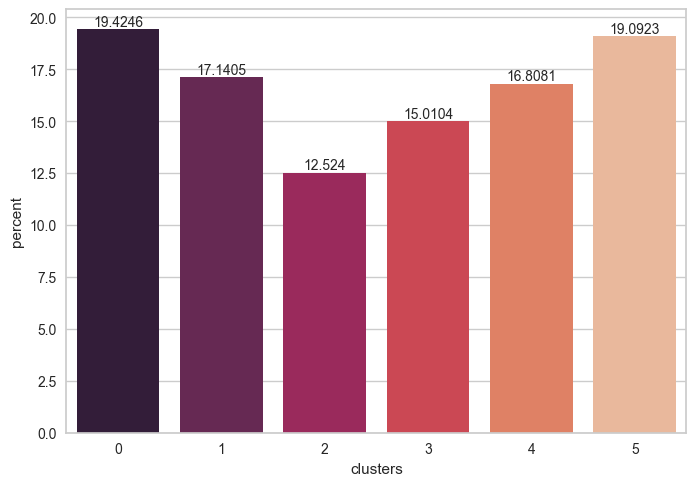

In [106]:
ax = sns.countplot(data=data_pca, x='clusters', stat='percent', palette = 'rocket')
for label in ax.containers:
    ax.bar_label(label, fontsize=10)
plt.show()

In [107]:
lrfm_columns = df_rfm_clean.columns[:-1].tolist()

In [108]:
def RFM_Clusters_Plots(df, columns):
    plt.figure(figsize=[len(columns)*7,5])
    
    i = 1
    c = ["#4793AF","#FFC470","#DD5746","#102C57","#41B06E"]
    for col in columns:
        
        ax = plt.subplot(1,len(columns),i)
        ax.vlines(df[col].median(), ymin=0, 
                  ymax=len(df['clusters'].unique())-1, 
                  color='grey', linestyle='--')
        
        g = df.groupby('clusters')
        
        x = g[col].median().index
        y = g[col].median().values
        
        ax.barh(x, y, color=c) 
        
        plt.title(col.upper())
        i = i+1

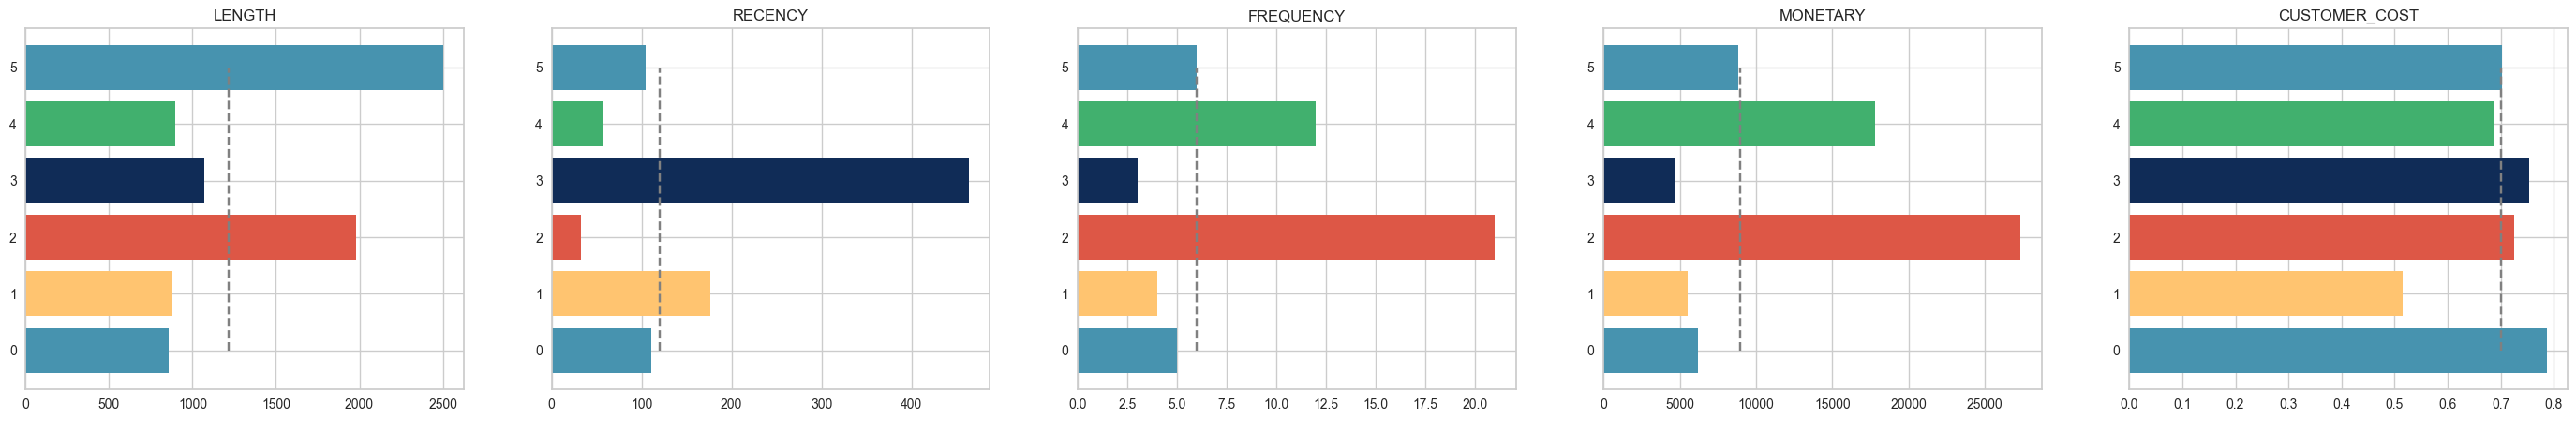

In [109]:
RFM_Clusters_Plots(df_rfm_clean, lrfm_columns)